<a href="https://colab.research.google.com/github/JefNtungila/Data-story-telling-using-public-data-from-CERN-Run2010B-public-Mu-dataset-/blob/master/Jef_Ntungila_Data_visualisation_using_Dimuon_event_information_derived_from_the_Run2010B_public_Mu_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import seaborn as sns

In [0]:
dimuon_events = pd.read_csv('https://raw.githubusercontent.com/JefNtungila/Data-story-telling-using-public-data-from-CERN-Run2010B-public-Mu-dataset-/master/MuRun2010B.csv')

Legend

•	Run: Run of the test

•	Event: Dimuon event

•	Type: T or G

•	E1: Total energy of first lepton (GeV)

•	pt1: Transverse momentum of the first lepton

•	eta1: The pseudorapidity of the first muon

•	px1: Momentum p resolved in the x direction for the first lepton

•	py1: Momentum p resolved in the y direction for the first lepton

•	pz1: Momentum p resolved in the z direction for the first lepton

•	phi1: The phi angle of the first lepton direction [radians]

•	Q1: The charge of the first lepton

•	E2: Total energy of second lepton (GeV)

•	pt2: Transverse momentum of the second lepton

•	eta2: The pseudorapidity of the second muon

•	px2: Momentum p resolved in the x direction for the second lepton

•	py2: Momentum p resolved in the y direction for the second lepton

•	pz2: Momentum p resolved in the z direction for the second lepton

•	phi2: The phi angle of the second lepton direction [radians]

•	Q2: The charge of the second lepton







Preliminary findings:

Q1 and Q2 mean is 0 as anticipated. Leptons change charge between -1 and 1.

In [0]:
list_columns = list(dimuon_events.columns.values)
list_columns

In [0]:
dimuon_events[['Event', 'px1 ','py1', 'pz1','px2','py2','pz2']].astype('int64')
dimuon_events[['Event', 'px1 ','py1', 'pz1','px2','py2','pz2']].head()

In [0]:
dimuon_events.sort_values(by=['Event'])
dimuon_events.dtypes

In [0]:
dimuon_events.head()


In [0]:
dimuon_events['Event'].tolist();


In [0]:
dimuon_events.describe(include='all')

In [0]:
x = dimuon_events['Event']
y = dimuon_events[['E1','E2']]


In [0]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

In [0]:
independent_variable = dimuon_events['Event'].values
dependent_variable_1 = dimuon_events['E1'].values
dependent_variable_1

In [0]:
fig = plt.figure(figsize=(10,6))
plt.xlim(-1000, 10**9)
plt.ylim(np.min(y)[0], (np.max(y)+1500)[0])
plt.xlabel('Events',fontsize=20)
plt.ylabel('E1,E2',fontsize=20)
plt.title('Energy of first and second lepton',fontsize=20);


def animate(i):
    data = dimuon_events[['E1','E2']].iloc[:int(i+1)] #select data range
    p = sns.lineplot(x = independent_variable , y = dependent_variable_1 , data=data, color="r")
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=7)
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=5, repeat=True)

plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg' # For google colab
HTML(ani.to_html5_video())


In [0]:
dimuon_events['E1 (px1, py1)'] = np.sqrt((dimuon_events['px1 '].values)**2 + (dimuon_events['py1'].values)**2)
dimuon_events['E1 (py1, pz1)'] = np.sqrt((dimuon_events['py1'].values)**2 + (dimuon_events['pz1'].values)**2) 
dimuon_events['E1 (px1, pz1)'] = np.sqrt((dimuon_events['px1 '].values)**2 + (dimuon_events['pz1'].values)**2) 

 # Momentum P components x and y unified in E1(x,y)
 # Momentum P components y and z unified in E1(y,z)
 # Momentum P components x and z unified in E1(y,z)

In [0]:
x = dimuon_events['Event']
y = dimuon_events[['E1 (px1, py1)','E1 (py1, pz1)', 'E1 (px1, pz1)' ]]
plt.plot(x, y)
plt.show()

In [0]:
x = dimuon_events['Event']
y = dimuon_events['E1 (px1, py1)']
plt.plot(x, y)
plt.show()

In [0]:
x = dimuon_events['Event']
y = dimuon_events['E1 (py1, pz1)']
plt.plot(x, y)
plt.show()

In [0]:
x = dimuon_events['Event']
y = dimuon_events['E1 (px1, pz1)' ]
plt.plot(x, y)
plt.show()

In [0]:
# E1 has considerably more variance in the z-direction. 
# The magnitude of momentum component z of E1 is relatively bigger than x and y.
# This is also observed from maximum/minimum in the describe table.

In [0]:
dimuon_events[['E1','E2']].corr()



#Correlation/Correlation coefficient is a measure of relationship between the variability (the variance) of 2 variables. 
#This measure is standardized and is not scale dependent.

In [0]:
#weak correlation (graphs might look similar but a correlation value of 0.05 clearly states that the correlation is weak)

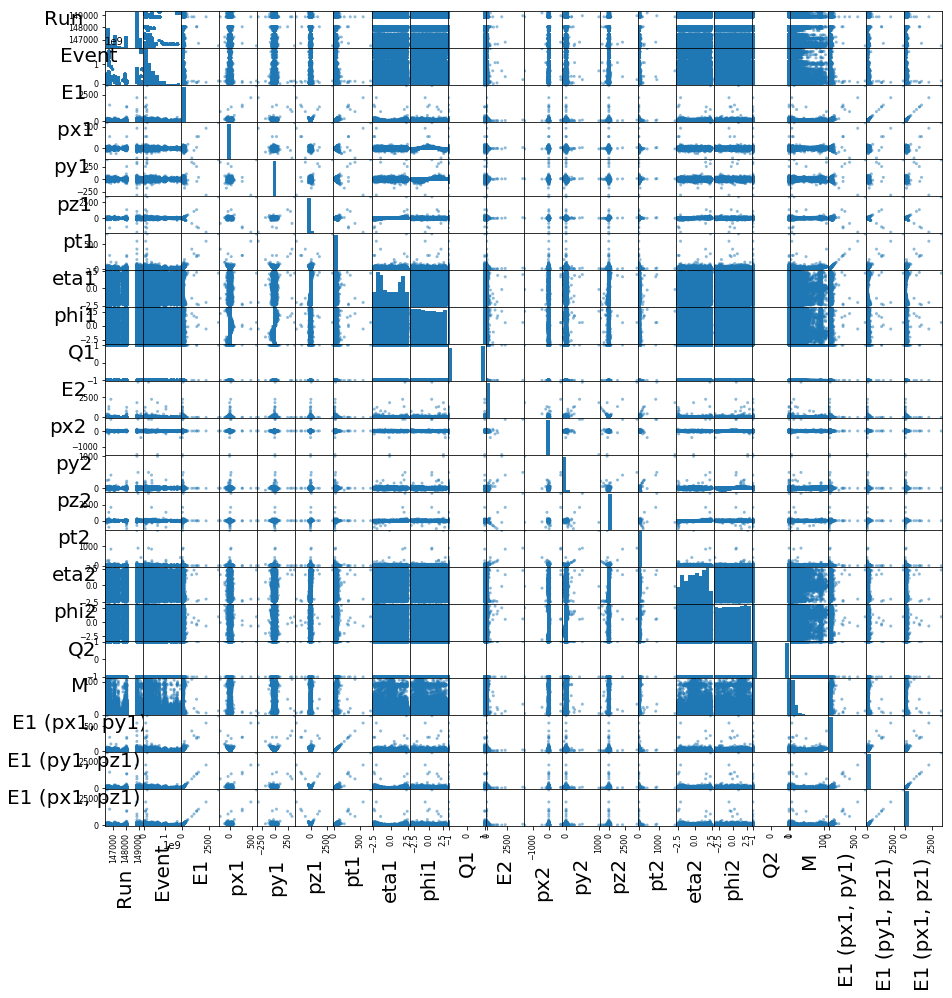

In [64]:
overview_data = pd.plotting.scatter_matrix(dimuon_events, alpha = 0.5, figsize  = [15, 15])

for ax in overview_data.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 0)